In [1]:
# 라이브러리 로딩

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
# 간단한 EDA 

# train 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 13개 변수를 가집니다.
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
# test 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 12개 변수를 가집니다.
# train 중 quality 변수가 사라졌습니다.
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [5]:
# train 데이터의 열 별 정보를 살펴봅니다. 
# 결측치는 없습니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


<AxesSubplot:>

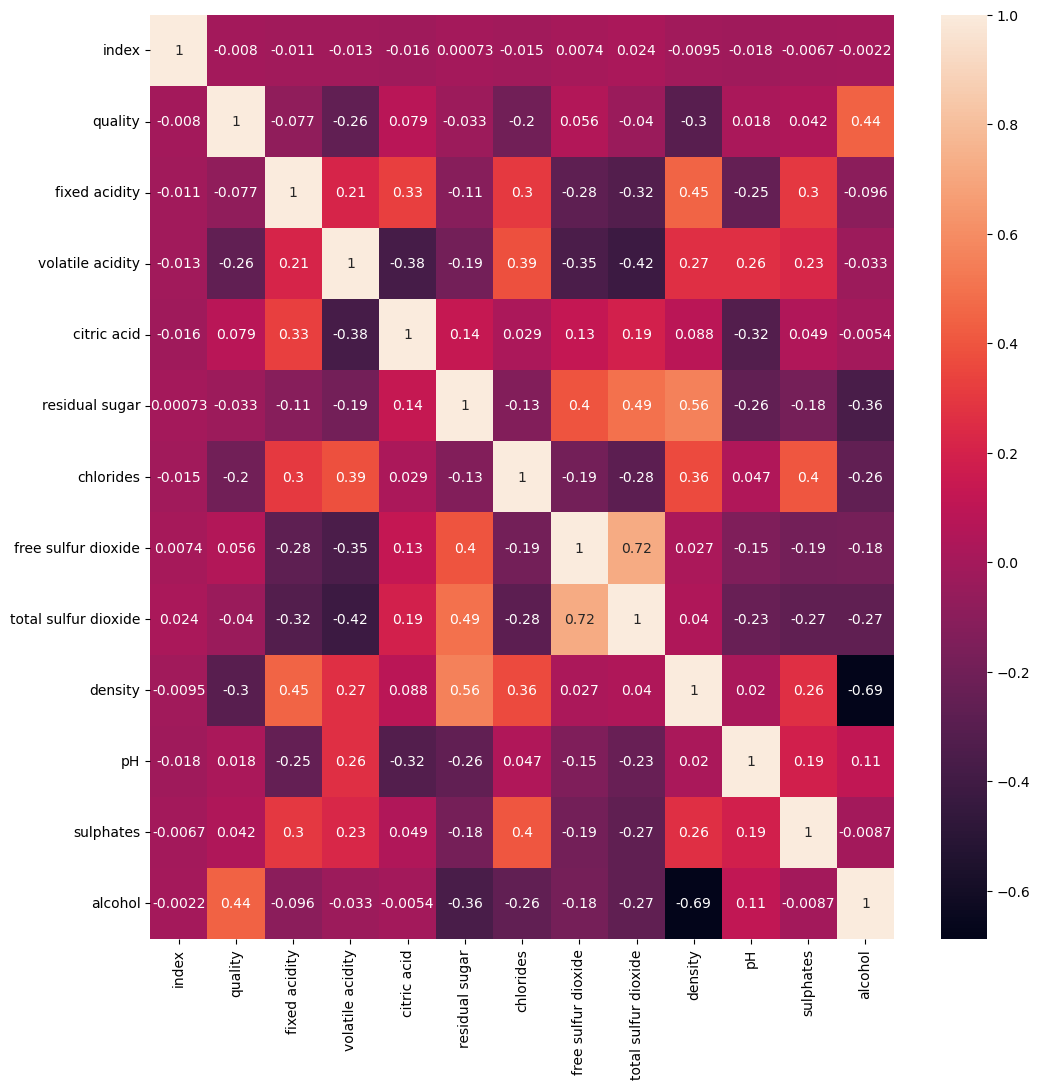

In [6]:
# train의 변수 간 상관관계를 살펴봅니다.
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True)

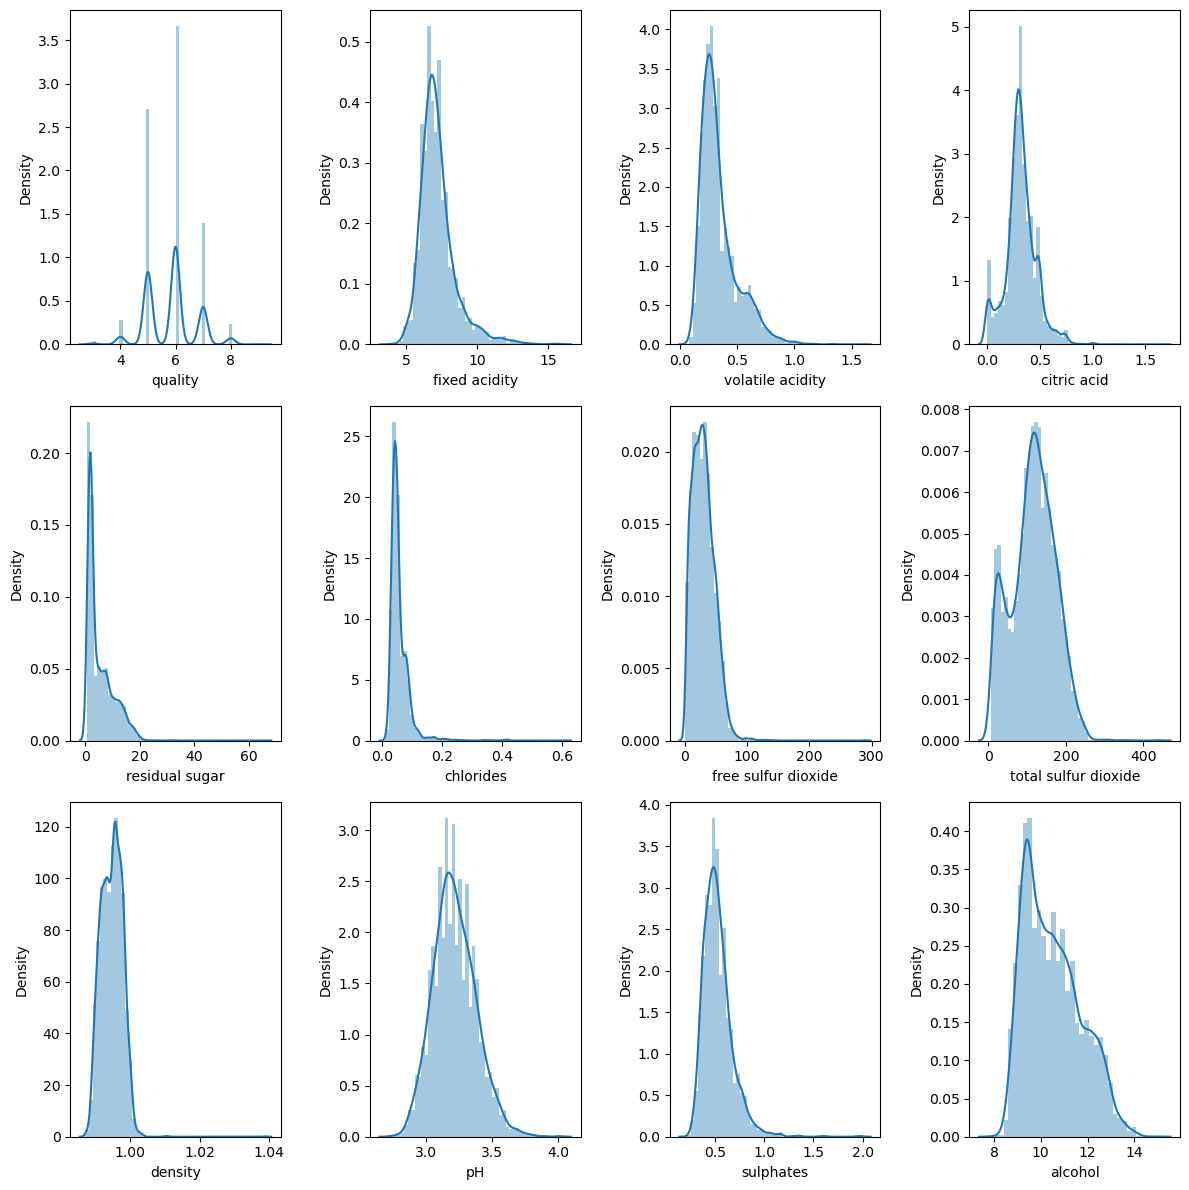

In [7]:
# train의 각 변수별 분포를 살펴봅니다. 
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

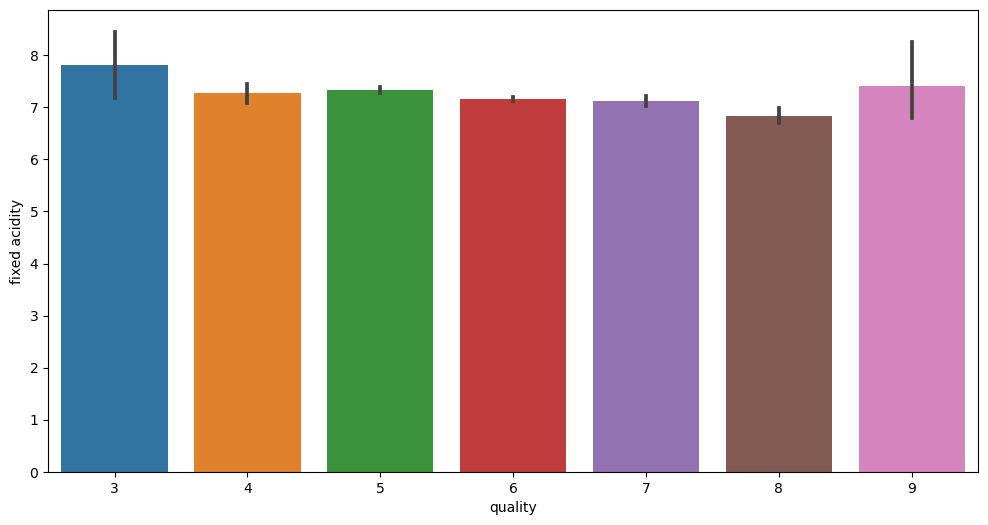

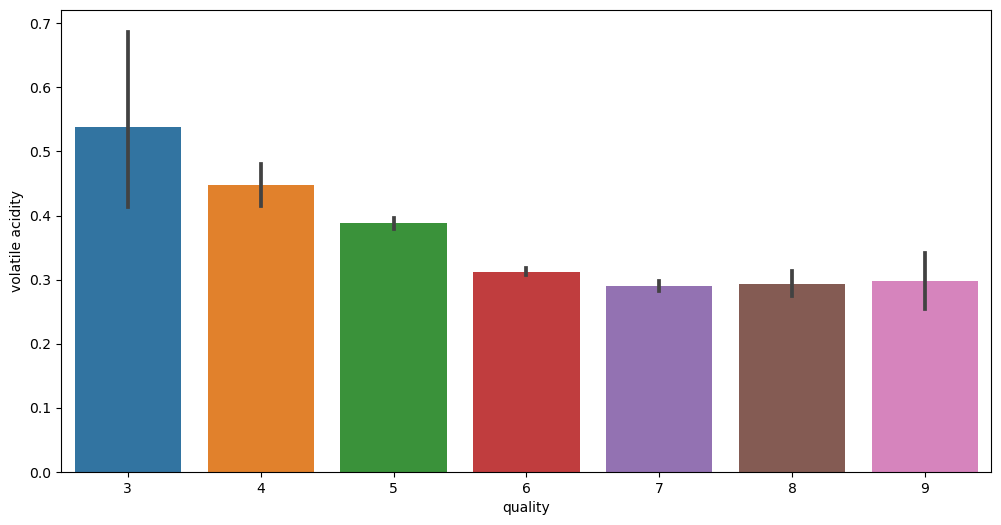

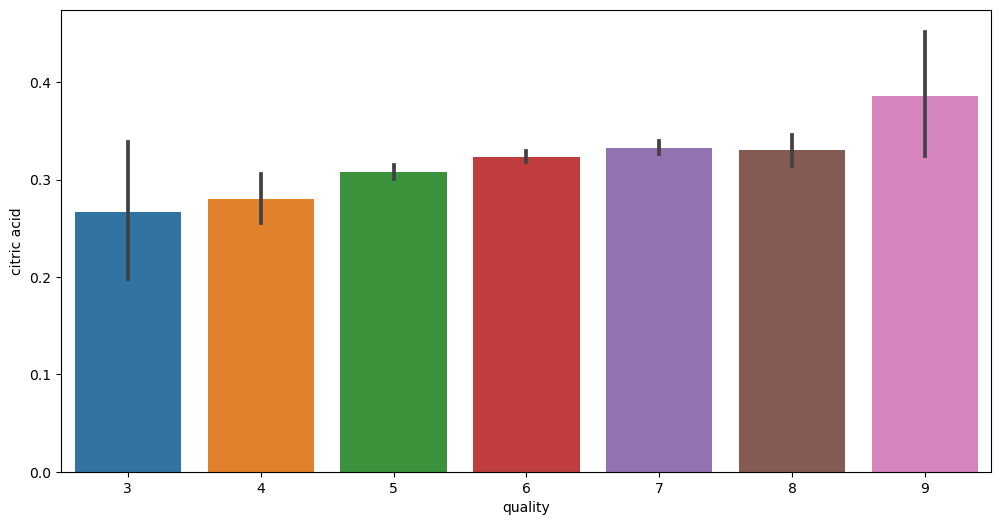

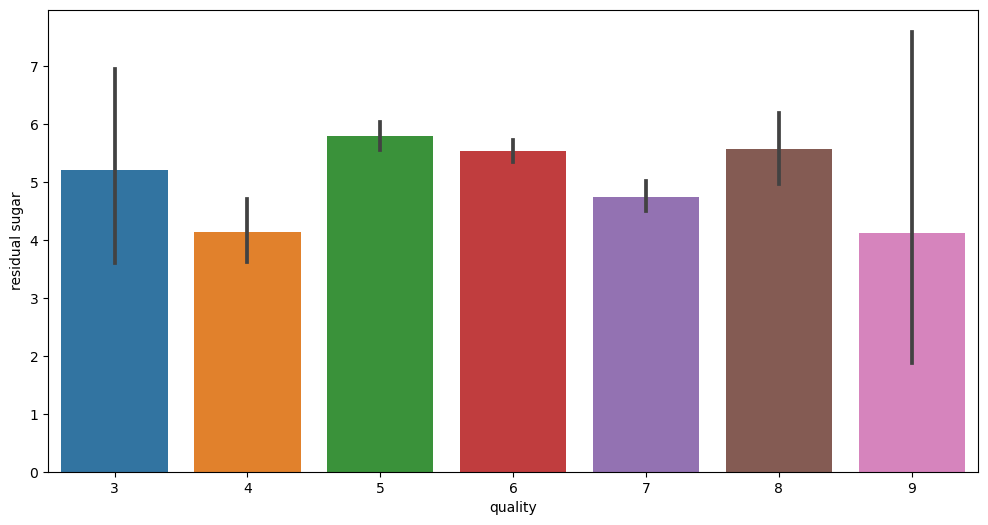

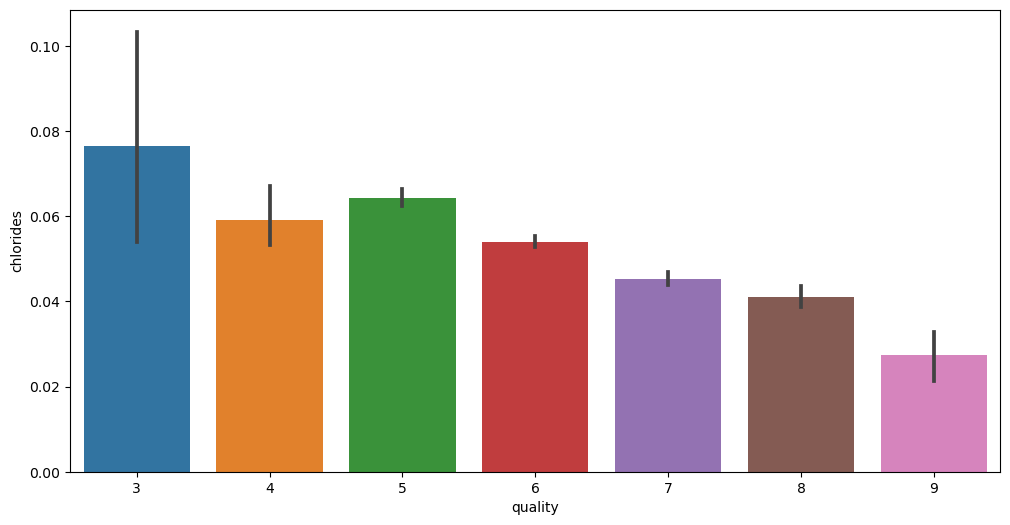

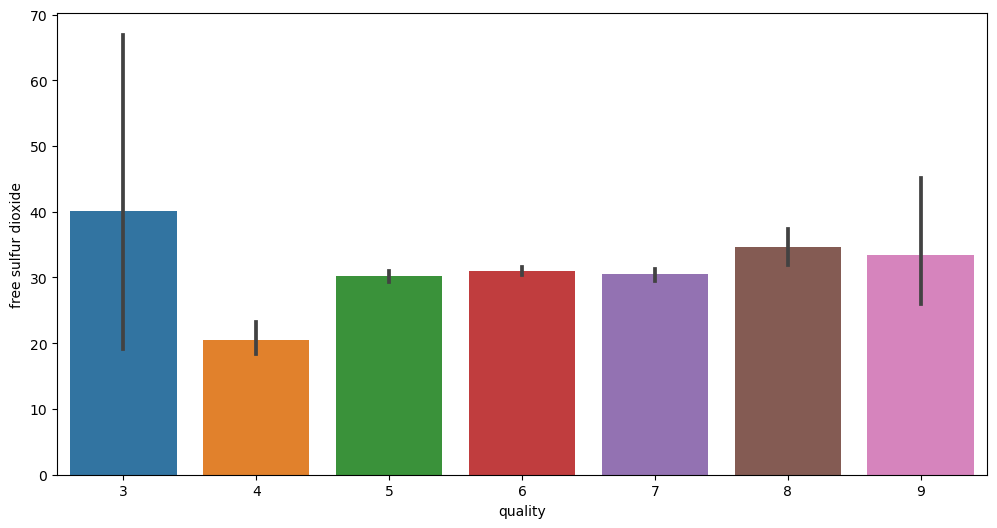

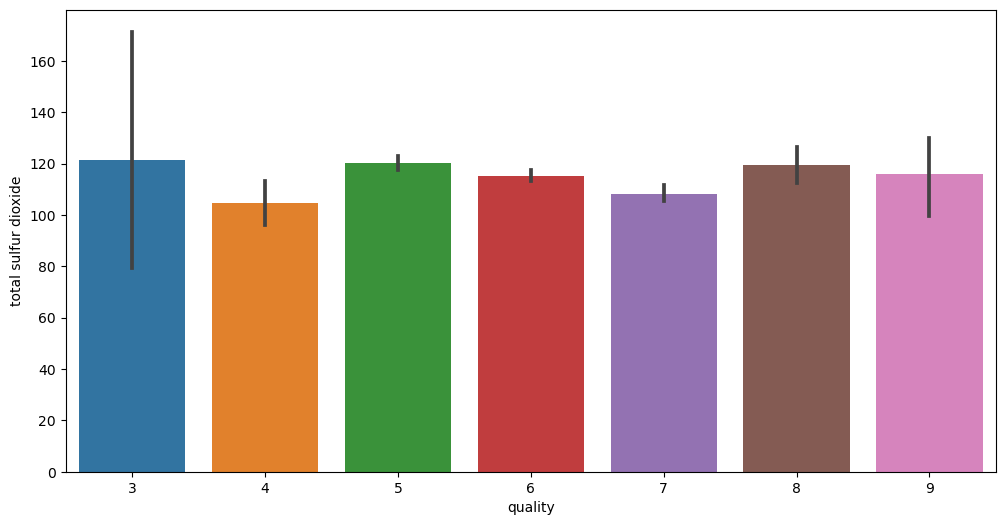

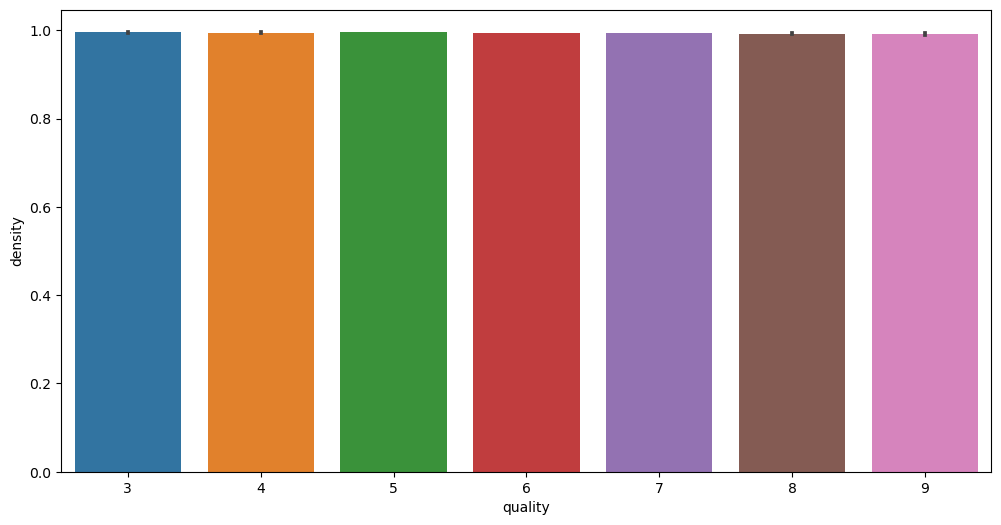

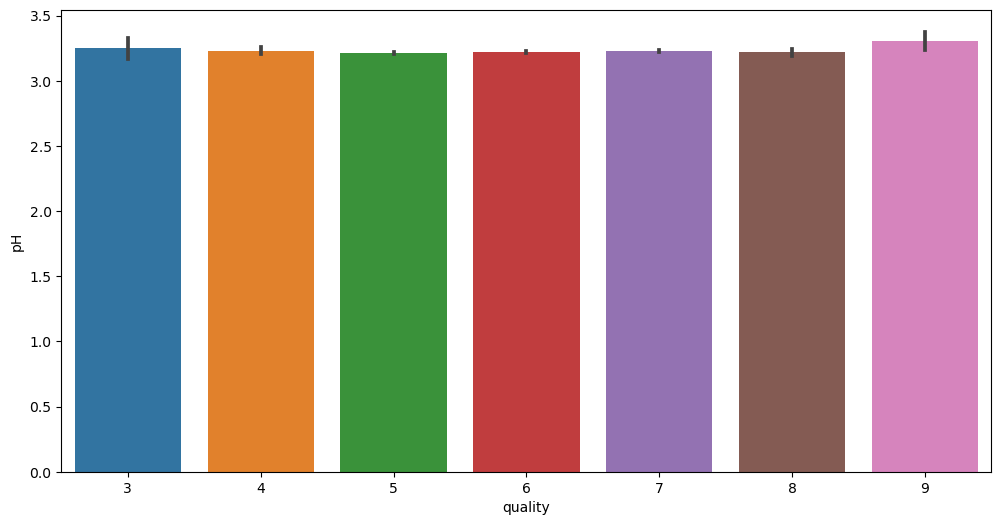

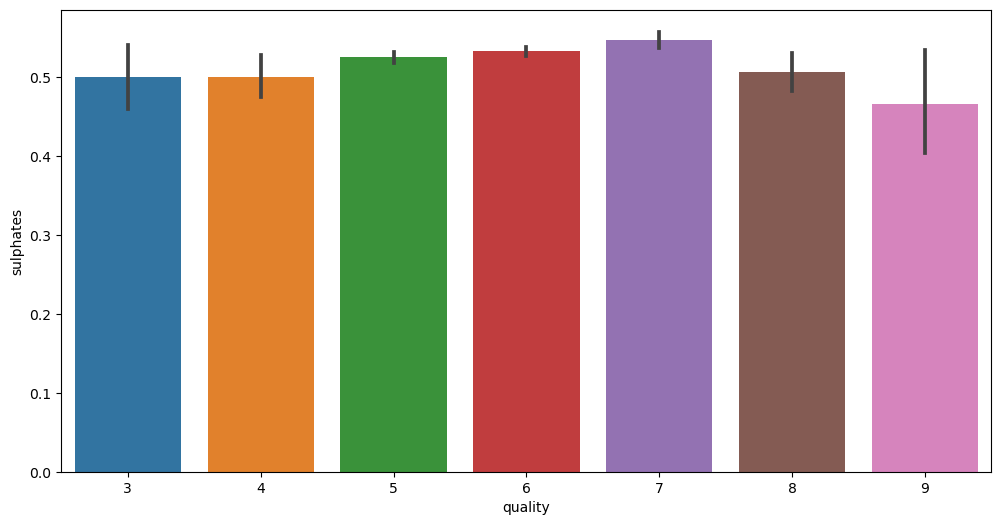

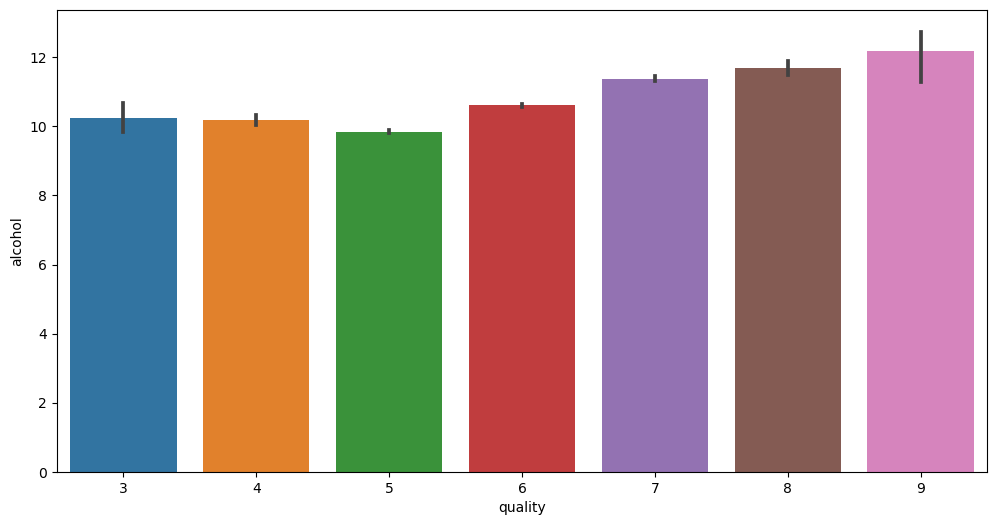

In [8]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

In [3]:
# 데이터 전처리

# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [26]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


In [4]:
# 불필요한 변수 제거
train_x = train.drop(['index', 'quality','residual sugar', 'total sulfur dioxide', 'pH', 'sulphates'], axis = 1)
train_y = train['quality']
test_x = test.drop(['index','residual sugar', 'total sulfur dioxide', 'pH', 'sulphates'], axis = 1)

train_x.shape, train_y.shape, test_x.shape

((5497, 8), (5497,), (1000, 8))

## 총 7개의 모델에 GridSearch를 통해 찾은 다양한 파라미터를 적용해 가며 가장 높은 정확도가 나타나는 모델을 찾은 결과 'Gradient Boosting'이 0.701로 가장 높게 나타남. 아래 코드는 각 7개의 모델을 fitting한 결과.

# Gradient Boosting (0.701)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = [
    {'min_samples_split':[5,10,15],'max_depth':[4,8,16],'learning_rate':[0.05,0.07]}
]

gb_clf = GradientBoostingClassifier(n_estimators=600)
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_x, train_y)

print(grid_search.best_estimator_)

GradientBoostingClassifier(learning_rate=0.07, max_depth=8, min_samples_split=5,
                           n_estimators=600)


In [46]:
# learning_rate=0.07, max_depth=8, min_samples_split=5, n_estimators=600
gb_clf = GradientBoostingClassifier(learning_rate=0.07, max_depth=8, min_samples_split=5,
                           n_estimators=600, random_state=156)
gb_clf.fit(train_x, train_y)
pred1 = gb_clf.predict(test_x)

In [17]:
# 제출 파일 생성

submission = pd.read_csv('sample_submission.csv')

submission['quality'] = pred1

submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,5
997,997,5
998,998,6


In [18]:
# csv 파일로 저장합니다.
submission.to_csv('baseline.csv', index=False)

# Logistic Regression

In [6]:
# 임의로 평가를 위해 train 데이터를 다시 한번 쪼갬 (test 데이터에 target값 없음)
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, shuffle = True,
                                                    test_size = 0.2, random_state=156)

In [7]:
from sklearn.linear_model import LogisticRegression

myLog = LogisticRegression()
myLog.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_predLog = myLog.predict(X_test)

accuracy_score(y_test, y_predLog)

0.519090909090909

In [8]:
# confusion matrix - quality : 3~9까지 존재
from sklearn.metrics import confusion_matrix
mymtxLog = confusion_matrix(y_test, y_predLog)
mymtxLog

array([[  0,   0,   4,   1,   0,   0,   0],
       [  0,   0,  18,  23,   0,   0,   0],
       [  0,   0, 177, 189,   0,   0,   0],
       [  0,   0,  90, 393,   1,   0,   0],
       [  0,   0,  19, 157,   1,   1,   0],
       [  0,   0,   3,  22,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

애초에, 로지스틱 회귀는 클래스가 2개일 때 적용하는 분석이므로 클래스가 여러 개인 지금의 분석과는 맞지 않음

# LDA

In [47]:
myLog.predict_proba(X_train)[:,3]

array([0.46975579, 0.4305483 , 0.39810586, ..., 0.51857112, 0.53060734,
       0.26919367])

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA
lda = LinearDiscriminantAnalysis(n_components=6) 
# n_components = (number of class - 1)
res = lda.fit(X_train, y_train).transform(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.5536363636363636

In [49]:
# 예측치에 대한 confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lda.predict(X_test))

array([[  0,   0,   3,   2,   0,   0,   0],
       [  1,   3,  21,  16,   0,   0,   0],
       [  1,   4, 224, 133,   4,   0,   0],
       [  0,   0,  95, 337,  51,   1,   0],
       [  1,   0,   8, 124,  45,   0,   0],
       [  0,   0,   1,  14,  10,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

결과가 그리 좋지 않음

In [50]:
# 카테고리컬 변수 제거한 경우
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA
lda1 = LinearDiscriminantAnalysis(n_components=6) 
lda2 = LinearDiscriminantAnalysis(n_components=6) 
# n_components = (number of class - 1)
def lda_mine(train_x):
    for i in range(len(train_x)):
        if train_x.loc[i][11] == 1:
            res = lda.fit(X_train, y_train).transform(X_train)



res = lda.fit(X_train, y_train).transform(X_train)

In [51]:
# 학습된 모델로 test 데이터 예측
y_pred = lda.predict(test_x)

# 제출 파일 생성

submission = pd.read_csv('sample_submission.csv')

submission['quality'] = y_pred

submission

,index,quality
0,0,6
1,1,5
2,2,5
3,3,6
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [52]:
# csv 파일로 저장합니다.
submission.to_csv('lda.csv', index=False)

# DecisionTree

In [53]:
from sklearn.tree import DecisionTreeClassifier

mytree = DecisionTreeClassifier(criterion = "gini", random_state = 156)
mytree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [54]:
# GridSearchCV로 최적화된 하이퍼 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : range(2,50)
}

grid_cv = GridSearchCV(mytree, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치: {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)

best_tree = grid_cv.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
GridSearchCV 최고 평균 정확도 수치: 0.5538
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 23}


In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, best_tree.predict(X_test))

0.5636363636363636

In [56]:
# 예측치에 대한 confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, best_tree.predict(X_test))

array([[  0,   0,   2,   3,   0,   0,   0],
       [  3,   9,  16,  10,   2,   1,   0],
       [  4,  12, 225, 105,  17,   3,   0],
       [  1,   9, 106, 298,  63,   7,   0],
       [  0,   5,  17,  67,  83,   6,   0],
       [  0,   0,   0,   9,  11,   5,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

In [57]:
#max_depth가 3부터 8까지 정확도 구해보기

result = []
for i in range(2,50):
    mytree = DecisionTreeClassifier(criterion = "gini", random_state = 21, max_depth=i)
    mytree.fit(X_train, y_train)
    result.append((i, accuracy_score(y_test, mytree.predict(X_test))))

result

[(2, 0.5418181818181819),
 (3, 0.5463636363636364),
 (4, 0.5527272727272727),
 (5, 0.5654545454545454),
 (6, 0.5590909090909091),
 (7, 0.5627272727272727),
 (8, 0.5481818181818182),
 (9, 0.5545454545454546),
 (10, 0.5490909090909091),
 (11, 0.5445454545454546),
 (12, 0.5481818181818182),
 (13, 0.5527272727272727),
 (14, 0.5736363636363636),
 (15, 0.57),
 (16, 0.5718181818181818),
 (17, 0.5690909090909091),
 (18, 0.5690909090909091),
 (19, 0.5709090909090909),
 (20, 0.5681818181818182),
 (21, 0.5663636363636364),
 (22, 0.5690909090909091),
 (23, 0.5763636363636364),
 (24, 0.5636363636363636),
 (25, 0.5772727272727273),
 (26, 0.5754545454545454),
 (27, 0.5754545454545454),
 (28, 0.5754545454545454),
 (29, 0.5754545454545454),
 (30, 0.5754545454545454),
 (31, 0.5754545454545454),
 (32, 0.5754545454545454),
 (33, 0.5754545454545454),
 (34, 0.5754545454545454),
 (35, 0.5754545454545454),
 (36, 0.5754545454545454),
 (37, 0.5754545454545454),
 (38, 0.5754545454545454),
 (39, 0.575454545454545

In [58]:
mytree2 = DecisionTreeClassifier(criterion = "gini", random_state = 21, max_depth=25)
mytree2.fit(X_train, y_train)

confusion_matrix(y_test, mytree2.predict(X_test))

accuracy_score(y_test, mytree2.predict(X_test))

0.5772727272727273

In [59]:
# 학습된 모델로 test 데이터 예측
y_pred = best_tree.predict(test_x)

# 제출 파일 생성

submission = pd.read_csv('sample_submission.csv')

submission['quality'] = y_pred

submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,7
...,...,...
995,995,6
996,996,5
997,997,5
998,998,6


In [60]:
# csv 파일로 저장합니다.
submission.to_csv('best_tree.csv', index=False)

# XGBoost (0.664)

In [61]:
# XGBoost 설치하기
import xgboost as xgb
from xgboost import XGBClassifier

In [62]:
# target 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(train_y)

In [63]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb = XGBClassifier(n_estimators=100)

params = {'max_depth': [5, 7] , 'min_child_weight': [1, 3] ,'colsample_bytree': [0.5, 0.75]}

# cv는 5으로 지정 
gridcv = GridSearchCV(xgb, param_grid=params, cv=5)
gridcv.fit(train_x, train_y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_) 

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1}


In [64]:
# n_estimators는 500으로 증가시키고, learning_rate=0.04로 감소, reg_alpha=0.03으로 추가함. 
xgb = XGBClassifier(n_estimators=500, random_state=156, learning_rate=0.04, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)
xgb.fit(train_x, train_y)
y_pred = xgb.predict(test_x)

In [65]:
# 제출 파일 생성

submission = pd.read_csv('sample_submission.csv')

submission['quality'] = y_pred + 3

submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [66]:
# csv 파일로 저장합니다.
submission.to_csv('baseline.csv', index=False)

# RandomForest (0.674)

In [77]:
# gridsearchCV 이용하기

from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100], 
    'max_depth':[16,17,18,19,50],
    'min_samples_leaf':[1,2,3,50],
    'min_samples_split':[1,2,50]
}

In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=156)
grid_cv = GridSearchCV(model, param_grid=params, cv=5)
grid_cv.fit(train_x,train_y)
print("최고 평균 정확도 : {0:4f}".format(grid_cv.best_score_))
print("최적 파라미터 : ", grid_cv.best_params_)

최고 평균 정확도 : 0.667266
최적 파라미터 :  {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
from sklearn.ensemble import RandomForestClassifier

# 모델 선언
model = RandomForestClassifier(n_estimators=100,max_depth=17,random_state=156)

# 모델 학습
model.fit(train_x, train_y)
y_pred = model.predict(test_x)

from sklearn.model_selection import cross_validate
cross_validate(model, train_x, train_y, cv=5)

from sklearn.model_selection import cross_val_predict
y_pred1 = cross_val_predict(model, train_x, train_y, cv=5)

from sklearn.model_selection import cross_val_score
y_valid_score = cross_val_score(model, train_x, train_y, cv=5)  # 교차 검증별 정확도
import numpy as np
np.mean(y_valid_score)  # 교차 검증 평균

0.6658140458267846

In [83]:
# 제출 파일 생성

submission = pd.read_csv('sample_submission.csv')

submission['quality'] = y_pred

submission.head()

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6


In [84]:
# csv 파일로 저장합니다.
submission.to_csv('baseline.csv', index=False)

# LightGBM (0.631)

In [7]:
# LightGBM 
from lightgbm import LGBMClassifier

# 임의로 평가를 위해 train 데이터를 다시 한번 쪼갬 (test 데이터에 target값 없음)
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, shuffle = True,
                                                    test_size = 0.2, random_state=156)

In [ ]:
params = {'n_estimators': [80, 90, 100, 110, 120],
          'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
          'reg_alpha': [0.88, 0.9, 0.92]}

In [10]:
lgbm_clf = LGBMClassifier(objective='multiclass', metric='multi_logloss')

params = {'n_estimators': [80, 90, 100, 110, 120],
          'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
          'reg_alpha': [0.88, 0.9, 0.92]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1, error_score='raise')
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='logloss', eval_set=[(X_train, y_train), (X_test, y_test)])
print("GridSearchCV 최고 평균 정확도 수치: {0:.4f}".format(gridcv.best_score_))
print("GridSearchCV 최적 파라미터:", gridcv.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[1]	valid_0's multi_logloss: 1.21377	valid_1's multi_logloss: 1.2415
[2]	valid_0's multi_logloss: 1.15855	valid_1's multi_logloss: 1.20448
[3]	valid_0's multi_logloss: 1.11437	valid_1's multi_logloss: 1.17606
[4]	valid_0's multi_logloss: 1.07796	valid_1's multi_logloss: 1.15227
[5]	valid_0's multi_logloss: 1.04615	valid_1's multi_logloss: 1.13116
[6]	valid_0's multi_logloss: 1.01951	valid_1's multi_logloss: 1.11554
[7]	valid_0's multi_logloss: 0.996025	valid_1's multi_logloss: 1.10262
[8]	valid_0's multi_logloss: 0.975434	valid_1's multi_logloss: 1.0914
[9]	valid_0's multi_logloss: 0.956265	valid_1's multi_logloss: 1.08079
[10]	valid_0's multi_logloss: 0.93772	valid_1's multi_logloss: 1.07014
[11]	valid_0's multi_logloss: 0.921777	valid_1's multi_logloss: 1.0622
[12]	valid_0's multi_logloss: 0.906738	valid_1's multi_logloss: 1.05585
[13]	valid_0's multi_logloss: 0.892747	valid_1's multi_logloss: 1.0489
[14]	valid_0's multi_logl

In [14]:
lgbm_wrapper = LGBMClassifier(learning_rate= 0.09, n_estimators=100, reg_alpha=0.88)

evals=[(X_train, y_train),(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_metric='logloss',
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(test_x)

[1]	training's multi_logloss: 1.20078	valid_1's multi_logloss: 1.22068
[2]	training's multi_logloss: 1.14477	valid_1's multi_logloss: 1.1835
[3]	training's multi_logloss: 1.10116	valid_1's multi_logloss: 1.15598
[4]	training's multi_logloss: 1.06483	valid_1's multi_logloss: 1.13366
[5]	training's multi_logloss: 1.0341	valid_1's multi_logloss: 1.11618
[6]	training's multi_logloss: 1.00732	valid_1's multi_logloss: 1.10322
[7]	training's multi_logloss: 0.982378	valid_1's multi_logloss: 1.09131
[8]	training's multi_logloss: 0.960819	valid_1's multi_logloss: 1.07965
[9]	training's multi_logloss: 0.940038	valid_1's multi_logloss: 1.06929
[10]	training's multi_logloss: 0.921022	valid_1's multi_logloss: 1.06113
[11]	training's multi_logloss: 0.904273	valid_1's multi_logloss: 1.0546
[12]	training's multi_logloss: 0.887548	valid_1's multi_logloss: 1.04803
[13]	training's multi_logloss: 0.872209	valid_1's multi_logloss: 1.04239
[14]	training's multi_logloss: 0.858812	valid_1's multi_logloss: 1.03

In [15]:
# 제출 파일 생성

submission = pd.read_csv('sample_submission.csv')

submission['quality'] = preds

submission.head()

,index,quality
0,0,5
1,1,5
2,2,6
3,3,6
4,4,6


In [16]:
# csv 파일로 저장합니다.
submission.to_csv('baseline.csv', index=False)